# Lung Disease

In [1]:
import pandas as pd
import numpy as np

df_lung = pd.read_csv('../input/LungDisease.csv')
df_lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


Text(0,0.5,'PEFR')

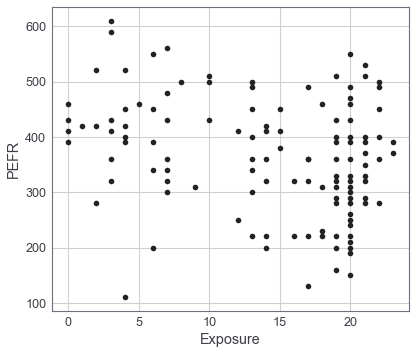

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

pefr = df_lung['PEFR'].values
expo = df_lung['Exposure'].values

plt.plot(expo, pefr, 'ko')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [14]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(expo.reshape(-1,1), pefr)
print(lin_reg.coef_, lin_reg.intercept_)

[-4.18457649] 424.582806573957


Text(0,0.5,'PEFR')

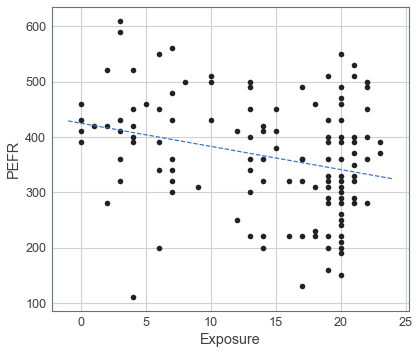

In [18]:
plt.plot(expo, pefr, 'ko')
plt.plot(range(-1,25), lin_reg.predict(np.array(range(-1,25)).reshape(-1,1)), 'b--')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [21]:
lin_reg.score(expo.reshape(-1,1), pefr)

0.0767410228628338

# King County Housing Data

In [26]:
df_house = pd.read_csv('../input/house_sales.csv', sep='\t')
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [28]:
X = df_house[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']].values
X

array([[2.4000e+03, 9.3730e+03, 3.0000e+00, 6.0000e+00, 7.0000e+00],
       [3.7640e+03, 2.0156e+04, 3.7500e+00, 4.0000e+00, 1.0000e+01],
       [2.0600e+03, 2.6036e+04, 1.7500e+00, 4.0000e+00, 8.0000e+00],
       ...,
       [1.0700e+03, 1.1170e+04, 1.0000e+00, 4.0000e+00, 6.0000e+00],
       [1.3450e+03, 6.2230e+03, 2.0000e+00, 3.0000e+00, 7.0000e+00],
       [7.9000e+02, 4.4000e+03, 1.5000e+00, 3.0000e+00, 7.0000e+00]])

In [30]:
y = df_house['AdjSalePrice'].values
y

array([ 300805., 1076162.,  761805., ...,  220744.,  342207.,  475489.])

In [32]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lin_reg.score(X, y)

0.5406641508395744

In [34]:
print(lin_reg.coef_, lin_reg.intercept_)

[ 2.28832107e+02 -6.05060092e-02 -1.94380990e+04 -4.77811534e+04
  1.06117210e+05] -521924.72203797416


In [35]:
lin_reg.score(X, y)

0.5406641508395744

In [39]:
import statsmodels.api as sm

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:07:12   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.219e+05   1.57e+04    -33.349      0.000   -5.53e+05   -4.91e+05
x1           228.8321      3.898     58.699      0.000     221.191     236.473
x2            -0.0605      0.061     -0.989      0.323      -0.180       0.059
x3         -1.944e+04   3625.219     -5.362      0.000   -2.65e+04   -1.23e+04
x4         -4.778e+04   2489.443    -19.194      0.000   -5.27e+04   -4.29e+04
x5          1.061e+05   2396.136     44.287      0.000    1.01e+05    1.11e+05
==============================================================================
Omnibus:                    29679.186   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19394127.212
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.565   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv = 5)
scores, np.mean(scores)

(array([0.58911134, 0.54811216, 0.52751099, 0.48017957, 0.55373405]),
 0.5397296205301588)

In [47]:
lasso_reg = linear_model.Lasso(alpha = 0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
lasso_reg.score(X, y)

0.5406641508390675

In [49]:
lasso_aic = linear_model.LassoLarsIC(criterion='aic')
lasso_aic.fit(X, y)

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
      fit_intercept=True, max_iter=500, normalize=True, positive=False,
      precompute='auto', verbose=False)

In [52]:
lasso_aic.alphas_, lasso_aic.criterion_

(array([1778.75352986, 1560.7061347 ,  120.29392337,   24.40480277,
           7.65722775,    0.        ]),
 array([22689.        , 20167.46353789, 10690.23857735, 10451.63030783,
        10432.61518427, 10431.8710816 ]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0,0.5,'AIC')

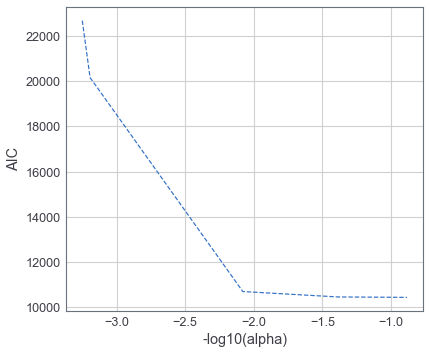

In [56]:
plt.plot(-np.log10(lasso_aic.alphas_), lasso_aic.criterion_, 'b--')
plt.xlabel('-log10(alpha)')
plt.ylabel('AIC')

In [76]:
getYear = lambda x: x[:4]

date = df_house['DocumentDate'].values
print(type(date))
print(date.shape)
"""for i in date:
    print(date[i])
    #date[i] = date[i][:4]
#date"""

<class 'numpy.ndarray'>
(22689,)


'for i in date:\n    print(date[i])\n    #date[i] = date[i][:4]\n#date'